<h1><center>WIMP relic density</center></h1>

In this problem sheet we will be solving the Boltzmann equation (Chapter 9.1) numerically and reproducing the typical WIMP abundance figures such as Figure 9.2 in the textbook (or similarly [here](https://www.researchgate.net/figure/Typical-evolution-of-the-WIMP-number-density-in-the-early-universe-during-the-epoch-of_fig1_46585999)).

## 1) The equilibrium curve $Y_{eq}$

**1.1** Assuming that the WIMP is always non-relativistic, write functions for the number density in equilibrium $n_{eq}$ and entropy $s$. To make things easier later, you should write the function such that they take x as an input parameter as well as any relevant constants.

**1.2** Hence plot the equilibrium abundance $Y_{eq} = n_{eq}/s$ as a function of $x = m_{\chi}/T$

*Hint: Assume $g_{*s}(T)$ is a constant $g_{*s} = 90$.*

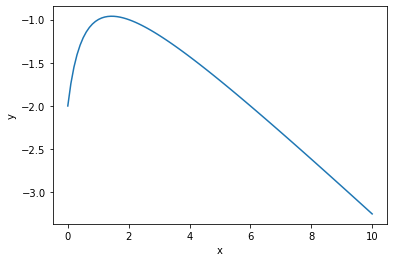

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def exampleFunc1(x, a):
    return a*x**2 + 4

def exampleFunc2(x, b):
    return b*x - 2

x = np.linspace(0, 10, 100)

y = exampleFunc1(x, 1)/exampleFunc2(x, -3)

# plot result
plt.plot(x, y)
plt.ylabel("y");
plt.xlabel("x");
plt.show()

## 2) Solving equations numerically

A function can be solved numerically if we have an equation for it's derivative $dy/dx$ and some initial value $y_i$ using something like 

\begin{equation}
    y_{n+1} \approx y_{n} + \Delta x_n \frac{dy_n}{dx_n}.
\end{equation}

While a little more sophisticated, this is the basic principle of ODE solvers such as <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html">`scipy.integrate.odeint`</a>.


As an example case, use `odeint` or otherwise to numerically solve the following:

\begin{equation}
    \frac{dy}{dx} = 9(x-4)^2 + 90\cos(3x)
\end{equation}

from the initial condition $(x_i, y_i) = (0,-192)$.

<i>Hint: Examples and tutorial video given <a href = "https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations">here</a>.

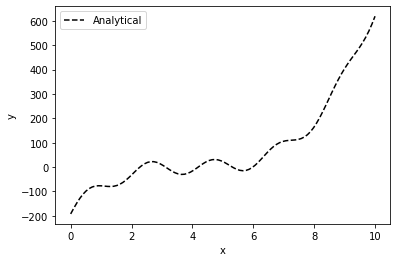

In [2]:
from scipy.integrate import odeint

def dydx():
    # input equation here
    return 0

#### Analytical solution ####
x = np.linspace(0, 10, 100)
y_analytical = 3*(x-4)**3 + 30*np.sin(3*x)

plt.plot(x, y_analytical,'k--', label = "Analytical")

# plotting labels
plt.ylabel("y");
plt.xlabel("x");
plt.legend()

#### Numerical solution ####
# replace this with solution from odeint
x = 0
y_numerical = 0
plt.plot(x, y_numerical, label = "Numerical")


plt.show()

## 3) Solving the Boltzmann equation

Recall the Boltzmann equation:

\begin{equation}
    \frac{x}{Y_{eq}}\frac{dY}{dx} = \frac{-n_{eq}(T) \langle \sigma v \rangle}{H(T)} \Big[ \Big(\frac{Y}{Y_{eq}}\Big)^2-1\Big].
\end{equation}

Write another function for calculating the Hubble parameter $H$ as a function of temperature $T$.

While it is possible to use odeint to solve this equation directly, due to the large gradients it requires a large number of integration steps and is therefore very computationally expensive. One way we can get around this is to rewrite the equations in log space. 

**3.1** Using the Boltzmann equation above, calculate $\frac{d\log{Y}}{d\log{x}}$.

**3.2** Hence use `odeint` or otherwise to solve $\log{Y}$ numerically as done in the example case for $m_{\chi} = 100$ GeV and $ \log(x) $ in the range $ \{0, 3\}$. You can assume that the cross section is independent of temperature.

**3.3** Plot the result on the same graph as $Y_{eq}$.

*Hint: Since the our values vary on logarithmic scales, it is often easier solve our ODE with `odeint()` in log-space*

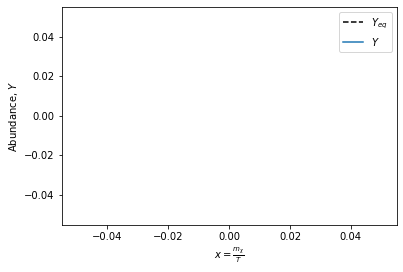

In [3]:
def deriv():
    return 0

x = 0
Y = 0

Y_eq = 0

plt.plot(x, Y_eq, 'k--', label = "$Y_{eq}$")
plt.plot(x, Y, label = "$Y$")
plt.xlabel(r"$x = \frac{m_{\chi}}{T}$");
plt.ylabel("Abundance, $Y$");
plt.legend();

## 4) $Y_{\infty}$ as a function of $\langle \sigma v \rangle$

**4.1** Repeat the above step for a few different values for the cross section in the range $\{10^{-14}, 10^{-8}\}$ GeV$^{-2}$ at a fixed WIMP mass.

**4.2** For each, extract the final value of $Y$. Hence make a plot of $Y_{\infty}$ against $\langle \sigma v \rangle$. Use <a href = "https://numpy.org/doc/1.18/reference/generated/numpy.polyfit.html">`numpy.polyfit`</a> to determine the relationship.

*Hint: We expect a power law profile.*

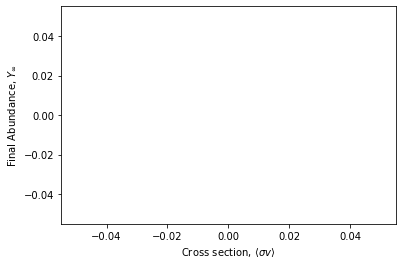

In [4]:
cross_sections = 0
Y_inf = 0

plt.plot(cross_sections, Y_inf)

# calculate power law
m, c = 0, 0
plt.plot(cross_sections, m*cross_sections+c)
plt.xlabel(r"Cross section, $\langle \sigma v \rangle$");
plt.ylabel("Final Abundance, $Y_{\infty}$");

## 5) $Y_{\infty}$ as a function of $m_{\chi}$

**5.1** Repeat the above step again but now for different values for the WIMP mass in the range $\{1, 10^{6}\}$ GeV.

**5.2** Make a plot of $Y_{\infty}$ against $M_{\chi}$. And determine the relationship using <a href = "https://numpy.org/doc/1.18/reference/generated/numpy.polyfit.html">`numpy.polyfit`</a>.
    
*Hint: We expect a power law profile.*

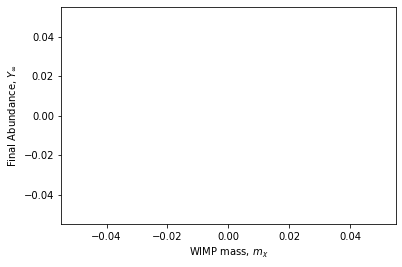

In [5]:
masses = 0
Y_inf = 0

plt.plot(masses, Y_inf)

# calculate power law
m, c = 0, 0
plt.plot(masses, m*masses+c)
plt.xlabel(r"WIMP mass, $m_{\chi}$");
plt.ylabel("Final Abundance, $Y_{\infty}$");

## 7) Calculating the relic density $\Omega_{\chi}h^2$

In chapter 9, we saw that the relic density can be calculated from $Y_{\infty}$ via

\begin{equation}
    Y_{\infty} = \frac{45}{2\pi^2}\frac{\Omega_{\chi}h^2}{m_{\chi}}\frac{M_H^2M_{pl}^2}{T_0^3 g_{*s}(T_0)}
\end{equation}

**7.1** Use this along with your solver to calulate $\Omega_{\chi}h^2$ for a the ranges of masses and cross sections given above. That is, make a 2D array containing the relic density for each combination of mass and cross section.

**7.2** Plot the result using <a href = "https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.contourf.html">matplotlib.pyplot.contourf</a>. 

**7.3** Add to your graph a single contour line indicating the values which give us the observed relic density of $\Omega_{DM}h^2 = 0.12$. An example of how to do this is included <a href="https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/contourf_demo.html#sphx-glr-gallery-images-contours-and-fields-contourf-demo-py">here</a>.

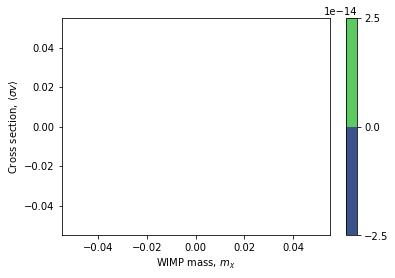

In [6]:
masses = np.zeros((2,2))
cross_sections = np.zeros((2,2))

Omega_chi = np.zeros((2,2))

plt.contourf(masses, cross_sections, Omega_chi)
plt.colorbar()
plt.xlabel(r"WIMP mass, $m_{\chi}$");
plt.ylabel(r"Cross section, $\langle \sigma v \rangle$");

## 8) $g_{*s}(T) \neq  const$

So far we have assumed that $g_{*s}(T) = const$. 

The number of relativistic degrees of freedom can be calculated numerically using lattice QCD. We can then make a interpolate the values at each temperature using a cubic spline. 

The following are values from <a href="https://arxiv.org/abs/1606.07494">Lattice QCD for Cosmology</a>. 

<table  style= "width:100%">
  <tr>
    <th>$\log_{10}{T}$ [MeV]</th>
    <td>0.0</td><td>0.5</td><td>1.0</td><td>1.25</td><td>1.6</td><td>2.0</td><td>2.15</td><td>2.2</td><td>2.4</td><td>2.5</td><td>3.0</td><td>4.0</td><td>4.3</td><td>4.6</td><td>5.0</td><td>5.45</td>
  </tr>
    
  <tr>
    <th>$g_{\rho}$</th>
    <td>10.71</td><td>10.74</td><td>10.76</td><td>11.09</td><td>13.68</td><td>17.61</td><td>24.07</td><td>29.84</td><td>47.83</td><td>53.04</td><td>73.48</td><td>83.1</td><td>85.56</td><td>91.97</td><td>102.17</td><td>104.98</td>
  </tr>
  <tr>
    <th>$\frac{g_{\rho}}{g_{*s}}$</th>
    <td>1.00228</td><td>1.00029</td><td>1.00048</td><td>1.00505</td><td>1.02159</td><td>1.02324</td><td>1.05423</td><td>1.07578</td><td>1.06118</td><td>1.0469</td><td>1.01778</td><td>1.00123</td><td>1.00389</td><td>1.00887</td><td>1.0075</td><td>1.00023</td>
  </tr>
</table>

Input these into <a href="https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d">`scipy.interpolate.interp1d`</a> to create a cubic spline.

**8.1** Use this to write a new function for $g_{*s}(T)$.

**8.2** Plot the interpolated value of $g_{*s}(T)$ along with the data points from the table. (Optional) include the values we would get if we chose to define $g_{*s}(T)$ as a step function (i.e. for T > 200 GeV: g_s = 106.75 etc... Nice summery <a href="https://physics.stackexchange.com/questions/169425/number-gt-of-relativistic-degrees-of-freedom-as-a-function-of-temperature-t">here</a>)

**8.3** Use this function to recalculate the above steps (3 to 7)

<i>Hint: Be careful with logs and units</i>

This functions will be used again when we calculate the axion relic density in a later problem sheet.

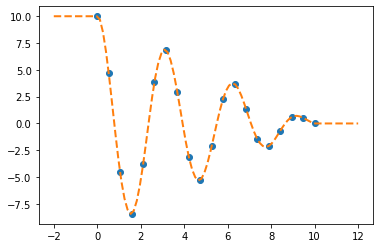

In [7]:
from scipy.interpolate import interp1d

# Example spline

x_data = [0.0, 0.526, 1.05, 1.58, 2.11, 2.63, 3.16, 3.68, 4.21, 4.74,
    5.26, 5.79, 6.32, 6.84, 7.37, 7.89, 8.42, 8.95, 9.47, 10.0]

y_data = [10.0, 4.69, -4.56, -8.42, -3.8, 3.86, 6.84, 2.95, -3.11, -5.26,
     -2.14, 2.32, 3.68, 1.38, -1.49, -2.1, -0.668, 0.608, 0.524, 0.0]

y_int = interp1d(x_data, y_data, kind="cubic", bounds_error=False, fill_value = (y_data[0], y_data[-1]))

# "bounds_error=False" tells the interpolator that we are okay with taking values outside of 
# the range of x_data

# fill_value = (below, above) tells the interpolator what to do with values outside the range
# of x_data

plt.plot(x_data, y_data, 'o')
x2 = np.linspace(-2, 12, 100)
plt.plot(x2, y_int(x2), '--', lw = 2)